In [22]:
import pandas as pd

# Download directly from UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv(url, header=None, sep=r'\s+', names=column_names)
print(data.head(100))

       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..      ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
95  0.12204   0.0   2.89     0  0.445  6.625  57.8  3.4952    2  276.0   
96  0.11504   0.0   2.89     0  0.445  6.163  69.6  3.4952    2  276.0   
97  0.12083   0.0   2.89     0  0.445  8.069  76.0  3.4952    2  276.0   
98  0.08187   0.0   2.89     0  0.445  7.820  36.9  3.4952    2  276.0   
99  0.06860   0.0   2.89     0  0.445  7.416  62.5  3.4952    2  276.0   

    PTRATIO       B  LSTAT  MEDV  
0      15.3  396.90   4.98  24.0  
1      17.8  396.90   9.14  21.6  
2     

In [27]:
#gives information about new feature being created
print("Creating new feature from AGE column...")
print("AGE represents how old the houses are (0-100 scale)")
print("\n")

#the creation of new feature
data['HOUSE_CONDITION'] = 'New'  # Default value
data.loc[data['AGE'] > 50, 'HOUSE_CONDITION'] = 'Old'
data.loc[data['AGE'] > 80, 'HOUSE_CONDITION'] = 'Very Old'

# Display results
print("Dataset with New Feature:")
print(data[['AGE', 'HOUSE_CONDITION', 'MEDV']].head(10))
print("\n")

print("House Condition Distribution:")
print(data['HOUSE_CONDITION'].value_counts())

Creating new feature from AGE column...
AGE represents how old the houses are (0-100 scale)


Dataset with New Feature:
     AGE HOUSE_CONDITION  MEDV
0   65.2             Old  24.0
1   78.9             Old  21.6
2   61.1             Old  34.7
3   45.8             New  33.4
4   54.2             Old  36.2
5   58.7             Old  28.7
6   66.6             Old  22.9
7   96.1        Very Old  27.1
8  100.0        Very Old  16.5
9   85.9        Very Old  18.9


House Condition Distribution:
HOUSE_CONDITION
Very Old    240
New         147
Old         119
Name: count, dtype: int64


In [28]:
X = data[['RM']]
y = data['MEDV']
print("Features (X):", X.columns.tolist())
print("Target (y): MEDV (house price)")
print("\n")

Features (X): ['RM']
Target (y): MEDV (house price)




In [31]:
import sys
!{sys.executable} -m pip install scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"Training set size: {len(X_train)} samples (80%)")
print(f"Testing set size: {len(X_test)} samples (20%)")
print("\n")

Data split into training and testing sets:
Training set size: 404 samples (80%)
Testing set size: 102 samples (20%)




In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")
print("\n")

Model trained successfully!




In [34]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print("\n")

Model Performance:
R² Score: 0.3708
Mean Squared Error: 46.1448




In [35]:
print("Sample Predictions vs Actual Values:")
print("=" * 50)
comparison = pd.DataFrame({
    'Actual Price': y_test[:10].values,
    'Predicted Price': y_pred[:10],
    'Difference': y_test[:10].values - y_pred[:10]
})
print(comparison)

Sample Predictions vs Actual Values:
   Actual Price  Predicted Price  Difference
0          23.6        23.732383   -0.132383
1          32.4        26.929502    5.470498
2          13.6        19.684568   -6.084568
3          22.8        20.451129    2.348871
4          16.1        22.619935   -6.519935
5          20.0        22.451666   -2.451666
6          17.8        19.039536   -1.239536
7          14.0        21.470094   -7.470094
8          19.6        21.984251   -2.384251
9          16.8        20.095894   -3.295894


In [39]:
y_pred = model.predict(X_test)
print("="*60)
print("MODEL EVALUATION METRICS")
print("="*60)

MODEL EVALUATION METRICS


In [40]:
mse = mean_squared_error(y_test, y_pred)
print(f"\n1. Mean Squared Error (MSE): {mse:.4f}")
print(f"   - MSE measures prediction errors")
print(f"   - Lower values are better")



1. Mean Squared Error (MSE): 46.1448
   - MSE measures prediction errors
   - Lower values are better


In [41]:
r2 = r2_score(y_test, y_pred)
print(f"\n2. R-squared (R²): {r2:.4f}")
print(f"   - R² shows how well the model fits the data")
print(f"   - Values closer to 1.0 are better")
print(f"   - This model explains {r2*100:.2f}% of the variance")

print("\n" + "="*60)
print("\n")


2. R-squared (R²): 0.3708
   - R² shows how well the model fits the data
   - Values closer to 1.0 are better
   - This model explains 37.08% of the variance





In [46]:
import sys
try:
    import matplotlib.pyplot as plt
except ImportError:
    print("Installing matplotlib...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
    import matplotlib.pyplot as plt
    print("Matplotlib installed successfully!")


In [47]:
# Creating figure for the plot
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

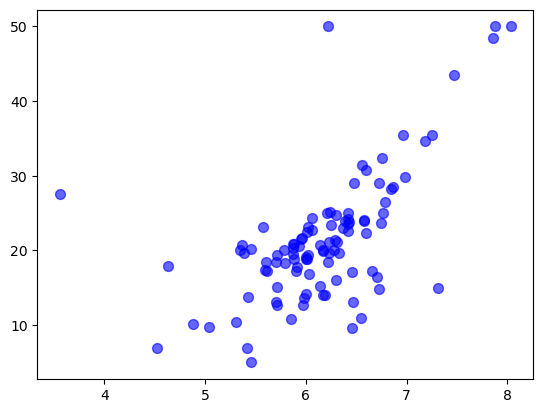

In [48]:
# Plot 1: Scatter plot of actual data points (test set)
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Data Points', s=50)


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


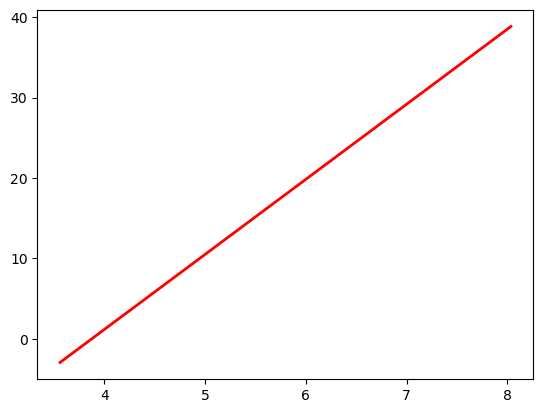

In [49]:
# Plot 2: Regression line
# Create a range of RM values for smooth line
X_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')